# Predict DROPOUT_RATE value using Linear Regression and tensorflow

First, we will load our data with Python's Pandas library. Let's import Pandas, Numpy, and TensorFlow, as we will need them 

In [1]:
#to import the libs to solve the problem
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns


Now that we have everything imported, let's look at our data! We will use pandas `pd.read_csv()` function to read in our data into a table called a DataFrame. 

We will store our Connecticut School Data in a DataFrame called `school_data`.

we will display the DataFrame's first 5 rows.

In [2]:
# read the school data
school_data = pd.read_csv('2018 dropout-graduation statistics VA.csv')

# display the school_data imported
school_data.head()


,SCHOOL_YEAR,LEVEL_CODE,DIV_NUM,DIV_NAME,SCH_NUM,SCH_NAME,FEDERAL_RACE_CODE,GENDER,DISABILITY_FLAG,LEP_FLAG,DISADVANTAGED_FLAG,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE
0,2017-2018,SCH,1,Accomack County,540,Arcadia High,NaN,NaN,NaN,NaN,NaN,154,82.47,12.34
1,2017-2018,SCH,1,Accomack County,540,Arcadia High,NaN,NaN,NaN,NaN,N,61,90.16,4.92
2,2017-2018,SCH,1,Accomack County,540,Arcadia High,NaN,NaN,NaN,NaN,Y,93,77.42,17.20
3,2017-2018,SCH,1,Accomack County,540,Arcadia High,NaN,NaN,NaN,N,NaN,131,82.44,11.45
4,2017-2018,SCH,1,Accomack County,540,Arcadia High,NaN,NaN,NaN,N,N,55,89.09,5.45


In [3]:
school_data.describe()

,DIV_NUM,SCH_NUM,FEDERAL_RACE_CODE,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE
count,45658.000000,45658.000000,29780.000000,45658.000000,45658.000000,45658.000000
mean,69.187503,588.009615,11.595400,64.759714,90.255430,6.647676
std,53.372089,587.385000,25.850082,78.737289,12.276947,10.291825
min,1.000000,10.000000,1.000000,10.000000,0.000000,0.000000
25%,29.000000,140.000000,3.000000,17.000000,87.100000,0.000000
50%,65.000000,452.000000,4.000000,33.000000,93.400000,3.450000
75%,106.000000,850.000000,5.000000,79.000000,98.180000,8.330000
max,917.000000,5010.000000,99.000000,977.000000,100.000000,94.120000




We need to predict graduation rate from one of these variables. This means that we need the graduation rate from this data. It looks like the column name Grad6YrRateHN is related to some sort of graduation rate. Let's check it out and see how it looks.



In [4]:
# display some data for the dependence value

school_data[['DROPOUT_RATE']].head()


,DROPOUT_RATE
0,12.34
1,4.92
2,17.20
3,11.45
4,5.45



Something looks odd. There is only one DROPOUT_RATE rate! These are including many NaN values in schold data, which means we have some missing data! Thus, we need to fill Nan values with any value and convert string type into value type.


In [5]:
# to set the lavel encoder for converting string into value
le = LabelEncoder()

#set the value to normalize whole indepence data
min_max = MinMaxScaler()

# to fill Nan value and string types with initial value
school_data["FEDERAL_RACE_CODE"] = school_data["FEDERAL_RACE_CODE"].replace({np.nan:3})
school_data["GENDER"] = school_data["GENDER"].replace({np.nan: 1,'M':1,'F':2})
school_data["DISABILITY_FLAG"] = school_data["DISABILITY_FLAG"].replace({np.nan: 2, 'Y': 1, 'N': 2})
school_data["LEP_FLAG"] = school_data["LEP_FLAG"].replace({np.nan : 2, 'Y': 1, 'N': 2})
school_data["DISADVANTAGED_FLAG"] = school_data["DISADVANTAGED_FLAG"].replace({np.nan: 2, 'Y': 1, 'N': 2})

# to transform string type into value type
le.fit(school_data["SCH_NAME"].values)
school_data["SCH_NAME"] = le.transform(school_data["SCH_NAME"].values)

# to display the changed result having values for indepence variables
school_data



,SCHOOL_YEAR,LEVEL_CODE,DIV_NUM,DIV_NAME,SCH_NUM,SCH_NAME,FEDERAL_RACE_CODE,GENDER,DISABILITY_FLAG,LEP_FLAG,DISADVANTAGED_FLAG,COHORT_CNT,DIPLOMA_RATE,DROPOUT_RATE
0,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,2,154,82.47,12.34
1,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,2,61,90.16,4.92
2,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,1,93,77.42,17.20
3,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,2,131,82.44,11.45
4,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,2,55,89.09,5.45
5,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,1,76,77.63,15.79
6,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,1,2,23,82.61,17.39
7,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,1,1,17,76.47,23.53
8,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,2,139,83.45,10.79
9,2017-2018,SCH,1,Accomack County,540,9,3.0,1,2,2,2,57,89.47,5.26


In [6]:

m_independence_colmun = ['SCH_NAME','FEDERAL_RACE_CODE','GENDER','DISABILITY_FLAG','LEP_FLAG','DISADVANTAGED_FLAG','COHORT_CNT','DIPLOMA_RATE']
m_dependence_colmun = ['DROPOUT_RATE']

X = school_data[m_independence_colmun]
Y = school_data[m_dependence_colmun]

X1 = min_max.fit_transform(X)

# Split X and Y in test and evaluate set
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X.head()

C:\Users\Elite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,SCH_NAME,FEDERAL_RACE_CODE,GENDER,DISABILITY_FLAG,LEP_FLAG,DISADVANTAGED_FLAG,COHORT_CNT,DIPLOMA_RATE
0,9,3.0,1,2,2,2,154,82.47
1,9,3.0,1,2,2,2,61,90.16
2,9,3.0,1,2,2,1,93,77.42
3,9,3.0,1,2,2,2,131,82.44
4,9,3.0,1,2,2,2,55,89.09


As you can see, our dataset has 8 columns. Let's checkout the column names so we can start deciding which variables will be important to us

In [7]:
X.columns

Index(['SCH_NAME', 'FEDERAL_RACE_CODE', 'GENDER', 'DISABILITY_FLAG',
       'LEP_FLAG', 'DISADVANTAGED_FLAG', 'COHORT_CNT', 'DIPLOMA_RATE'],
      dtype='object')

We need to predict DROPOUT_RATE from these variables. This means that we need the DROPOUT_RATE from this data. It looks like the column name DROPOUT_RATE is related to some sort of DROPOUT_RATE. Let's check it out and see how it looks.

In [9]:
Y.head()

,DROPOUT_RATE
0,12.34
1,4.92
2,17.20
3,11.45
4,5.45


In [10]:
m_independence_colmun1 = m_independence_colmun
m_independence_colmun1.append('DROPOUT_RATE')
all_data = school_data[m_independence_colmun]

The below figure is showing the frequency and correlation for the each independence variables.

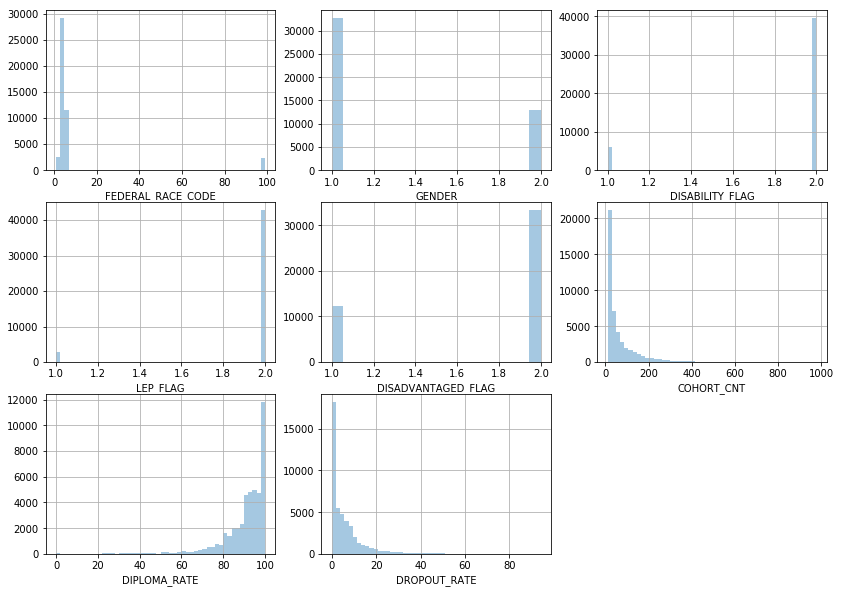

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))
m_attribue = all_data.columns
for i in range(1,len(m_attribue)):
    plt.subplot(3,3,i)
    sns.distplot(all_data[m_attribue[i]], kde=False)
    plt.xlabel(m_attribue[i])
    plt.grid()

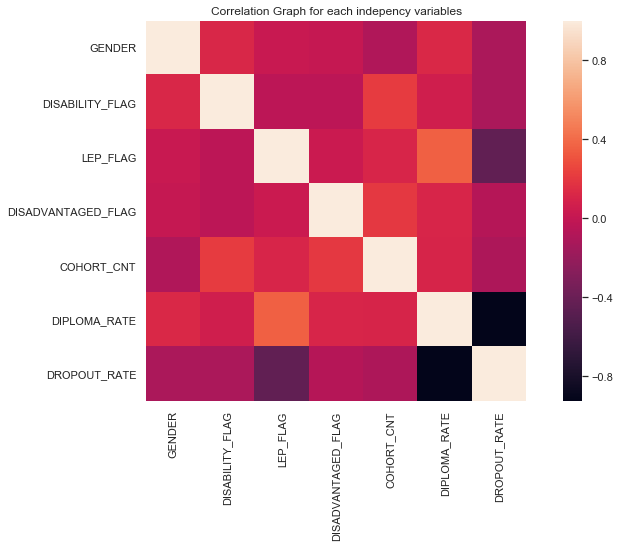

In [13]:
corr = all_data.select_dtypes(include=['float64', 'int64']).iloc[:, 1:].corr()

plt.figure(figsize=(13, 7))
sns.set(font_scale=1)
sns.heatmap(corr, vmax=1, square=True)
plt.title('Correlation Graph for each indepency variables')
plt.show()


these figures are showing the correlation degree between each independence variable and dropout_rate variable.

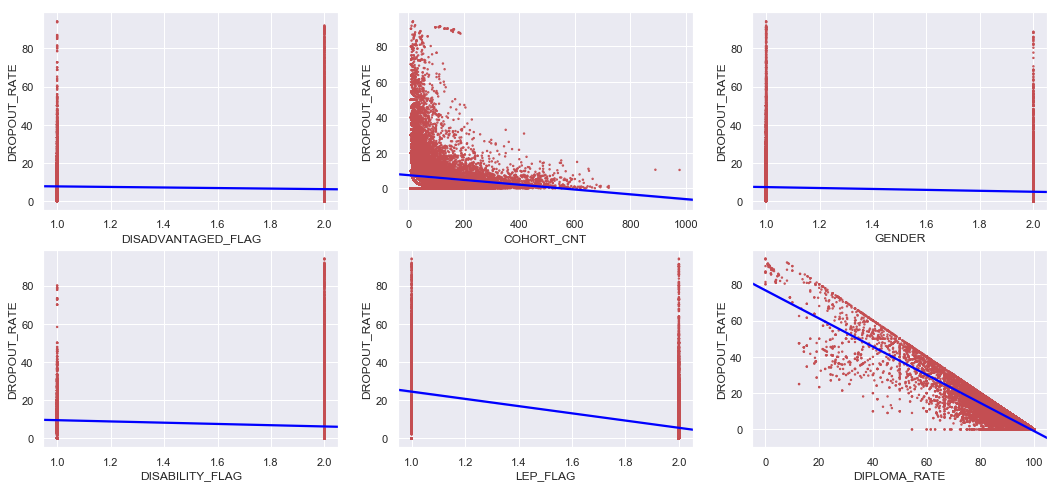

In [14]:
corr_list = corr['DROPOUT_RATE'].sort_values(axis=0, ascending=False).iloc[1:]
plt.figure(figsize=(18, 8))
for i in range(6):
    ii = '23' + str(i + 1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(all_data[feature], all_data['DROPOUT_RATE'], facecolors='none', edgecolors='r', s=2)
    sns.regplot(x=feature, y='DROPOUT_RATE', data=all_data, scatter=False, color='Blue')
    ax = plt.gca()
plt.show()

Now that we have our train and test sets, let's create our TensorFlow model.
 First we will define X and Y with TensorFlow Placeholders. We will also create the variable n which we will use later for our cost function. Where n is whole number of training data.


In [24]:
batch_size = 1000
epoch = 2000
learn_rate = 0.01

n = len(X_train)
n_dim = X_train.shape[1]
m_step = np.int16(n/batch_size)


 Now, let's initialize our weight and bias variables as W and b. Also, we will define our variables for the learning rate of our model, and the number of iterations it will use to calculate our regression line.
 We will set y_ to the y = Wx + b function for a line, except with our weight and bias variables substituted in.

In [25]:
# Model linear regression y = Wx + b
x = tf.placeholder(tf.float32, [None, n_dim], name="x")
W = tf.Variable(tf.zeros([n_dim, 1]), name="W")
b = tf.Variable(tf.zeros([1]), name="b")
with tf.name_scope("Wx_b") as scope:
    product = tf.matmul(x, W)
    y = product + b

y_ = tf.placeholder(tf.float32, [None, 1])


Now we will define our cost function as cost and our optimization technique as optimizer. We will be using the mean squared error cost function with gradient descent which minimizes loss. For more info on cost functions and gradient descent and how they are implemented in Machine Learning models

In [26]:
# Cost function sum((y_-y)**2)
with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(tf.square(y_ - y))
    cost_sum = tf.summary.scalar("cost", cost)

# Training using Gradient Descent to minimize cost
with tf.name_scope("train") as scope:
    train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)


Now it's time to run our model! Run the cell below to calculate our training_cost, weight, and bias.
We will make correlation graph between real value to our predictions using the y = Wx + b function for a line and will plot it!

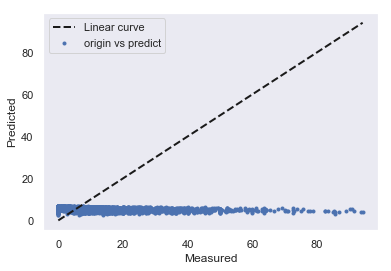

0 epoch: 	 cost: 112.60770


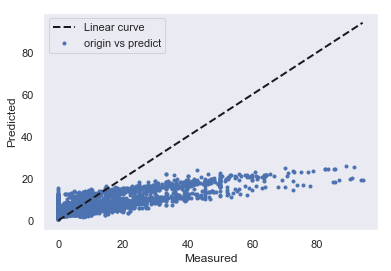

50 epoch: 	 cost: 65.49878


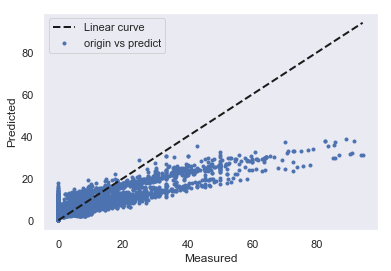

100 epoch: 	 cost: 42.92444


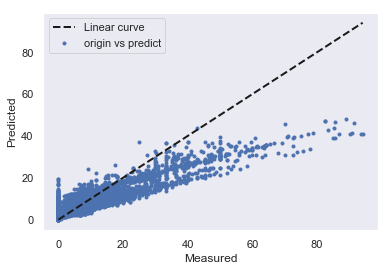

150 epoch: 	 cost: 30.32501


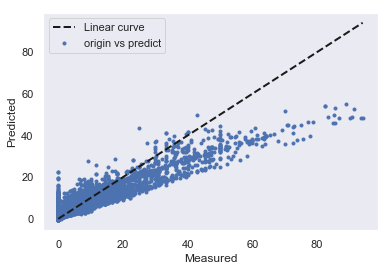

200 epoch: 	 cost: 23.13601


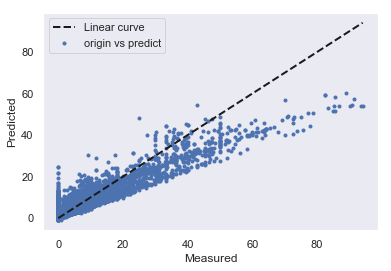

250 epoch: 	 cost: 19.00642


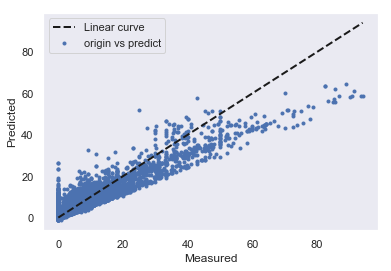

300 epoch: 	 cost: 16.62608


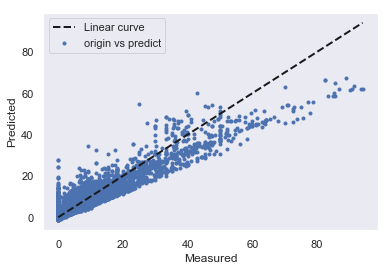

350 epoch: 	 cost: 15.24996


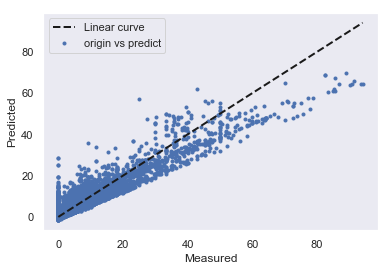

400 epoch: 	 cost: 14.45199


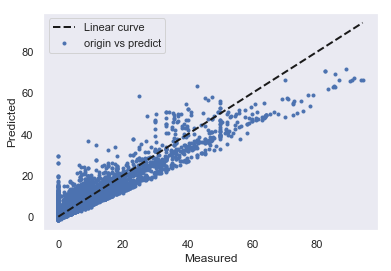

450 epoch: 	 cost: 13.98762


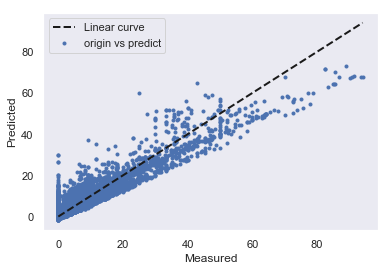

500 epoch: 	 cost: 13.71631


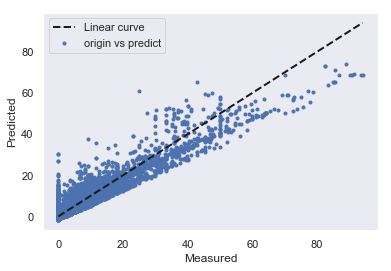

550 epoch: 	 cost: 13.55709


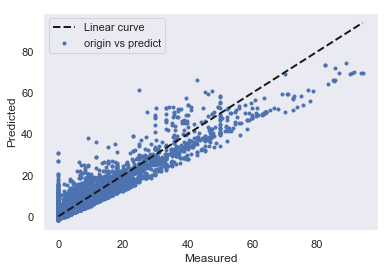

600 epoch: 	 cost: 13.46319


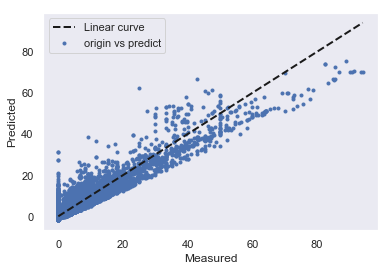

650 epoch: 	 cost: 13.40751


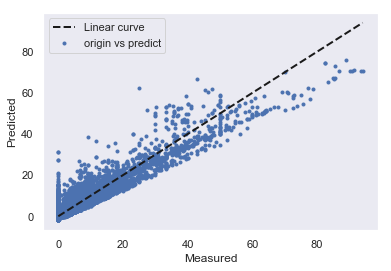

700 epoch: 	 cost: 13.37429


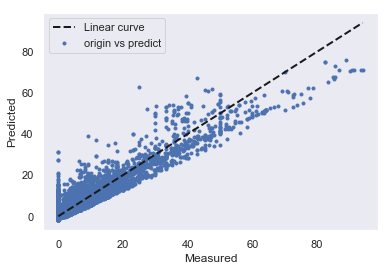

750 epoch: 	 cost: 13.35435


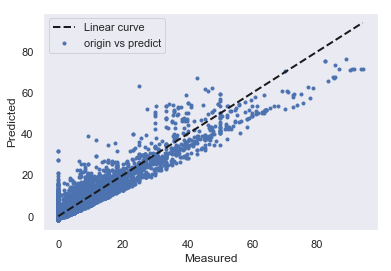

800 epoch: 	 cost: 13.34232


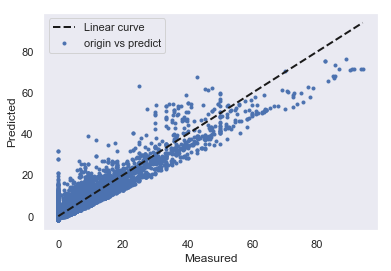

850 epoch: 	 cost: 13.33499


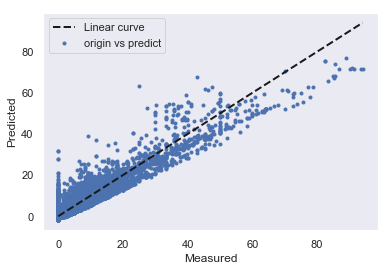

900 epoch: 	 cost: 13.33051


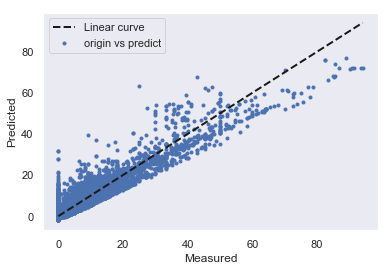

950 epoch: 	 cost: 13.32775


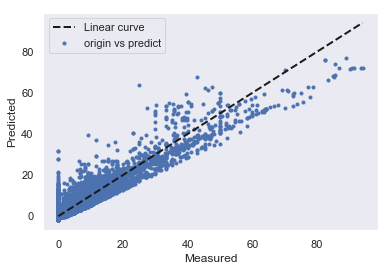

1000 epoch: 	 cost: 13.32604


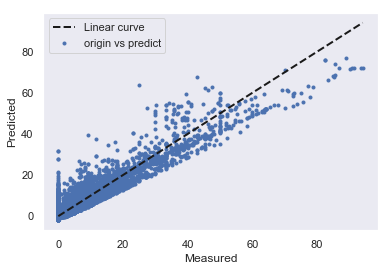

1050 epoch: 	 cost: 13.32497


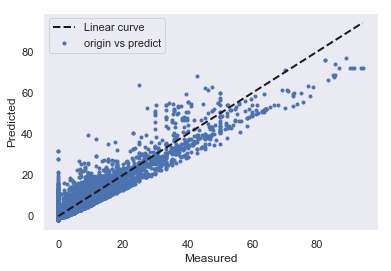

1100 epoch: 	 cost: 13.32431


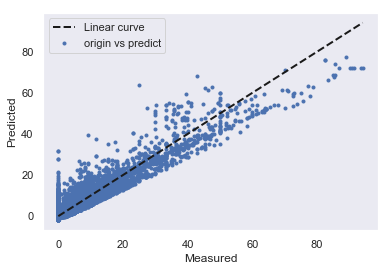

1150 epoch: 	 cost: 13.32389


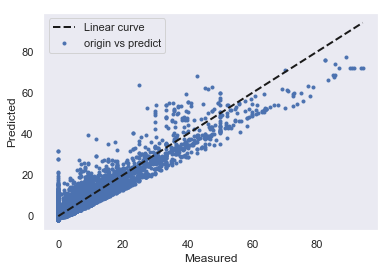

1200 epoch: 	 cost: 13.32362


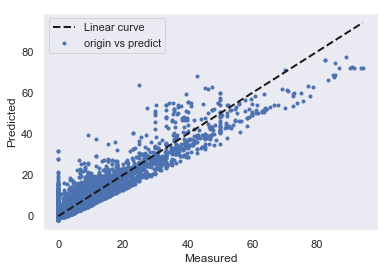

1250 epoch: 	 cost: 13.32346


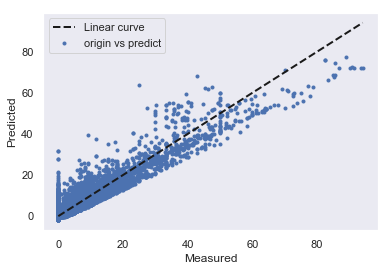

1300 epoch: 	 cost: 13.32335


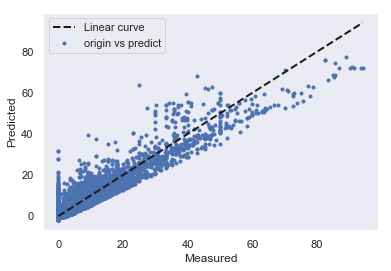

1350 epoch: 	 cost: 13.32329


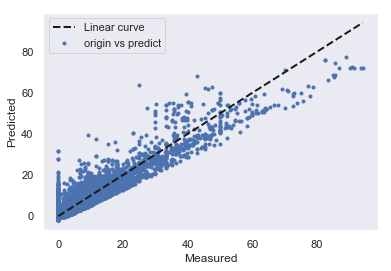

1400 epoch: 	 cost: 13.32325


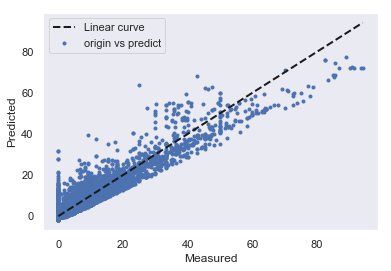

1450 epoch: 	 cost: 13.32322


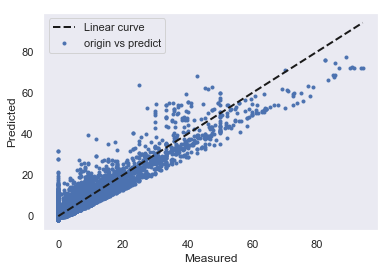

1500 epoch: 	 cost: 13.32321


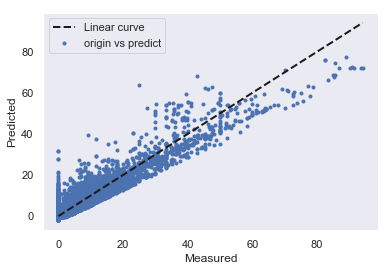

1550 epoch: 	 cost: 13.32320


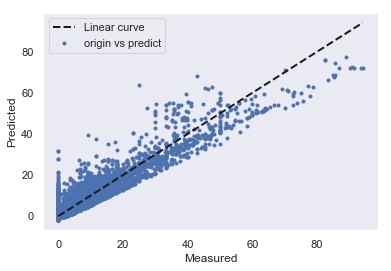

1600 epoch: 	 cost: 13.32320


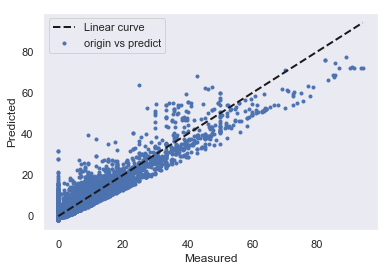

1650 epoch: 	 cost: 13.32319


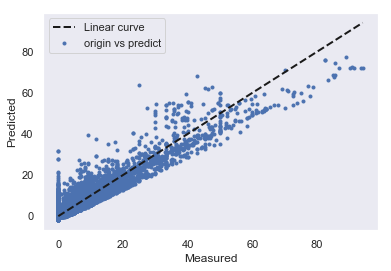

1700 epoch: 	 cost: 13.32319


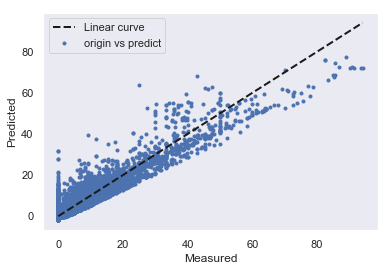

1750 epoch: 	 cost: 13.32319


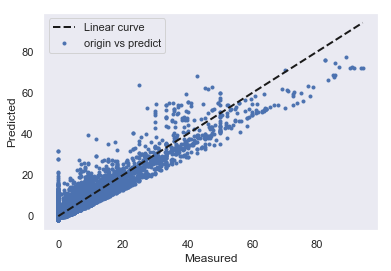

1800 epoch: 	 cost: 13.32319


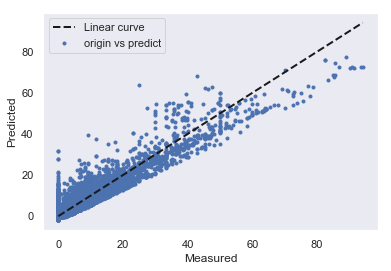

1850 epoch: 	 cost: 13.32319


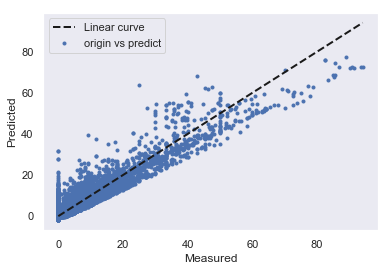

1900 epoch: 	 cost: 13.32319


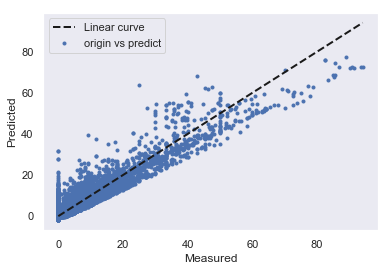

1950 epoch: 	 cost: 13.32320


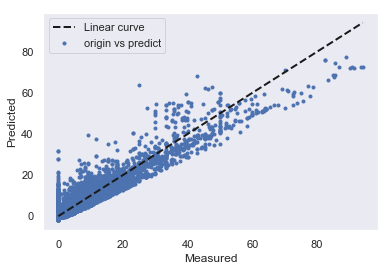

2000 epoch: 	 cost: 13.32320


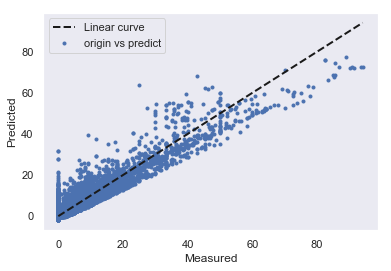

2050 epoch: 	 cost: 13.32320


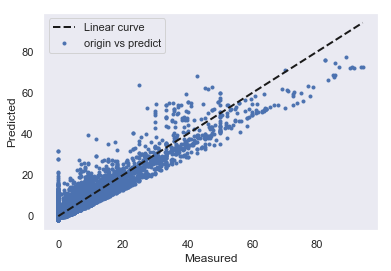

2100 epoch: 	 cost: 13.32320


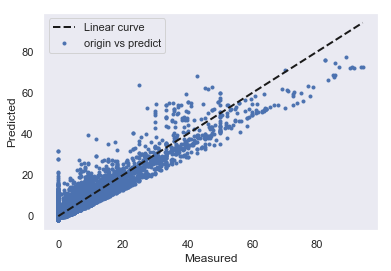

2150 epoch: 	 cost: 13.32320


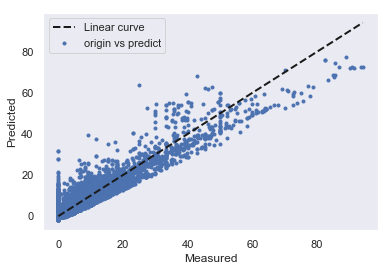

2200 epoch: 	 cost: 13.32320


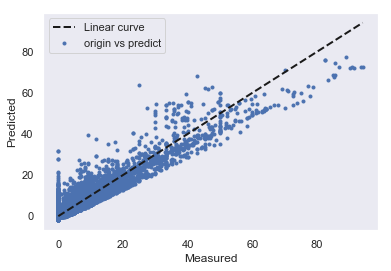

2250 epoch: 	 cost: 13.32320


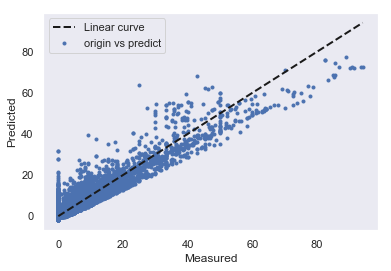

2300 epoch: 	 cost: 13.32320


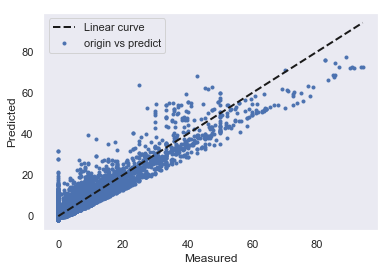

2350 epoch: 	 cost: 13.32320


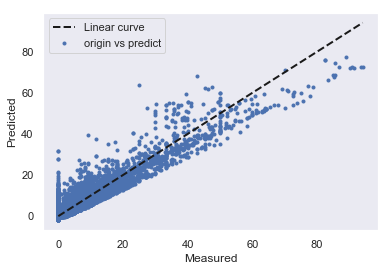

2400 epoch: 	 cost: 13.32320


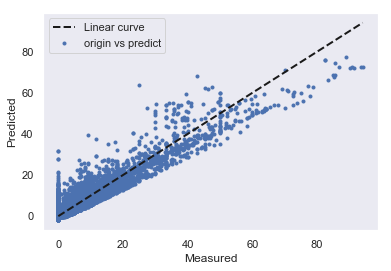

2450 epoch: 	 cost: 13.32320


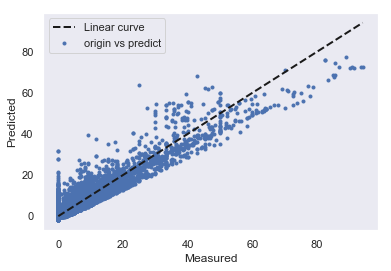

2500 epoch: 	 cost: 13.32320


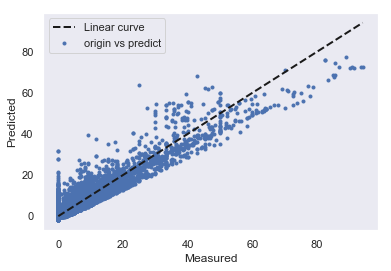

2550 epoch: 	 cost: 13.32319


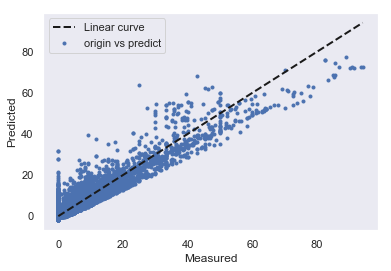

2600 epoch: 	 cost: 13.32320


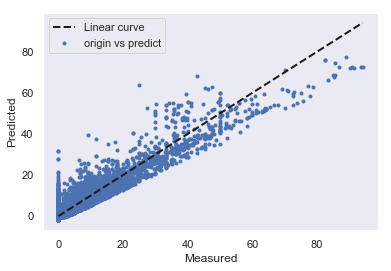

2650 epoch: 	 cost: 13.32320


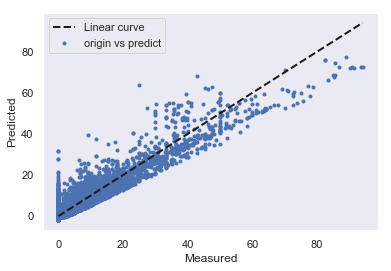

2700 epoch: 	 cost: 13.32320


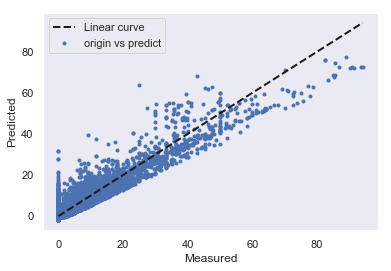

2750 epoch: 	 cost: 13.32320


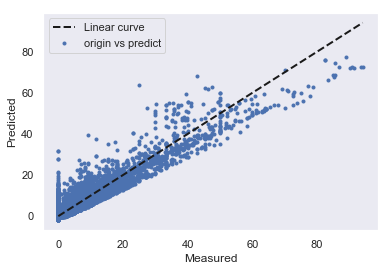

2800 epoch: 	 cost: 13.32320


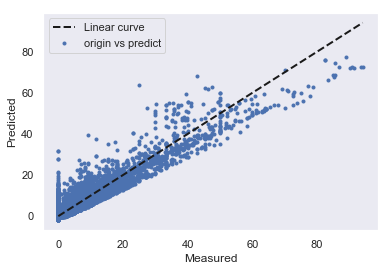

2850 epoch: 	 cost: 13.32320


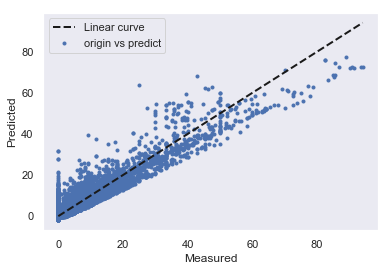

2900 epoch: 	 cost: 13.32320


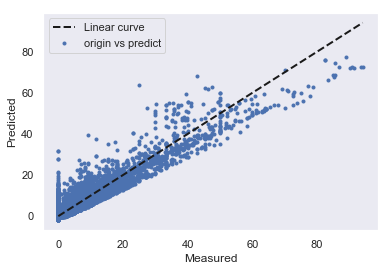

2950 epoch: 	 cost: 13.32320


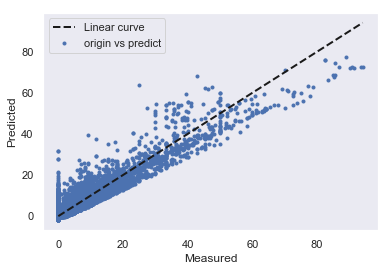

3000 epoch: 	 cost: 13.32320


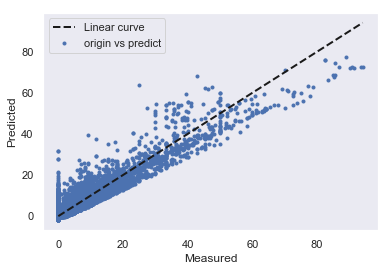

3050 epoch: 	 cost: 13.32320


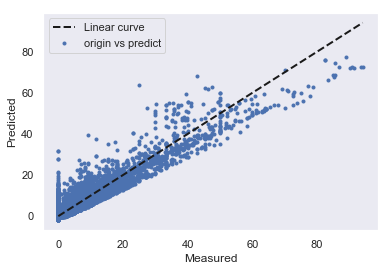

3100 epoch: 	 cost: 13.32320


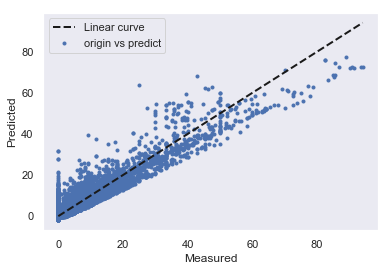

3150 epoch: 	 cost: 13.32320


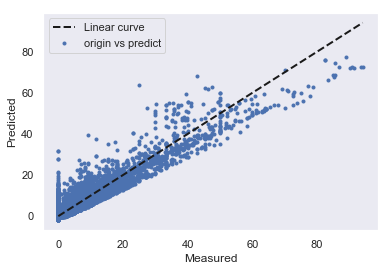

3200 epoch: 	 cost: 13.32320


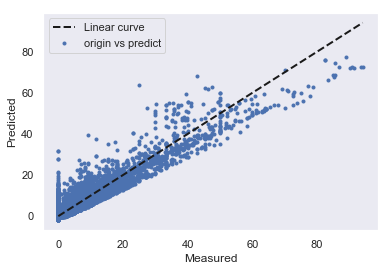

3250 epoch: 	 cost: 13.32320


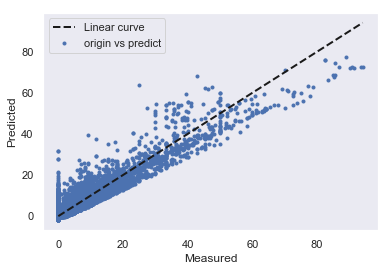

3300 epoch: 	 cost: 13.32320


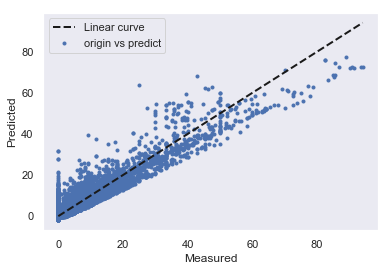

3350 epoch: 	 cost: 13.32320


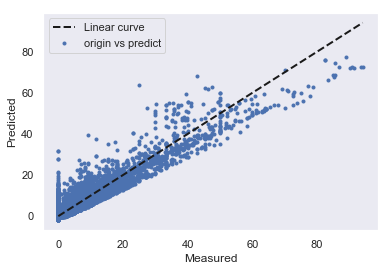

3400 epoch: 	 cost: 13.32320


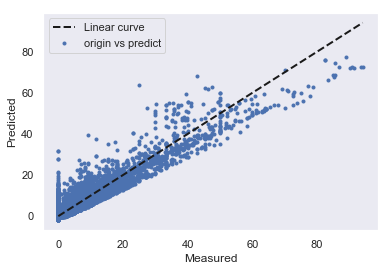

3450 epoch: 	 cost: 13.32320


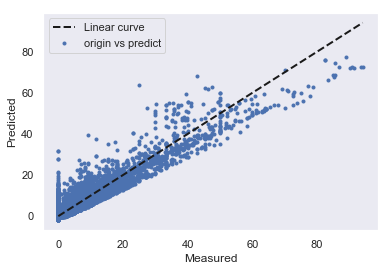

3500 epoch: 	 cost: 13.32320


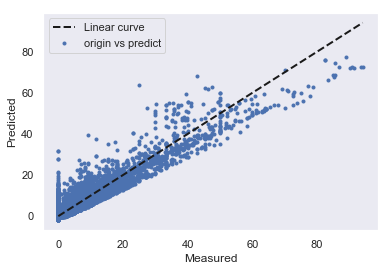

3550 epoch: 	 cost: 13.32320


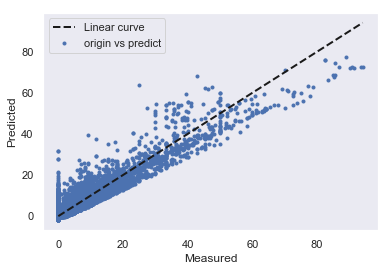

3600 epoch: 	 cost: 13.32320


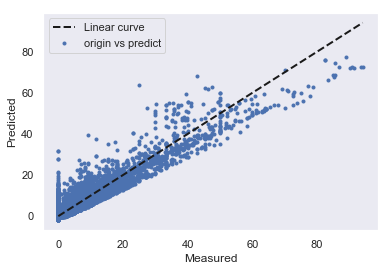

3650 epoch: 	 cost: 13.32320


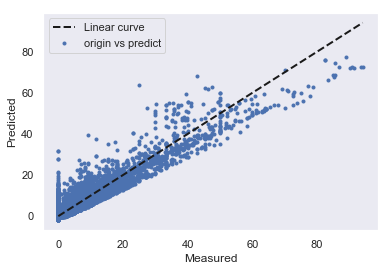

3700 epoch: 	 cost: 13.32320


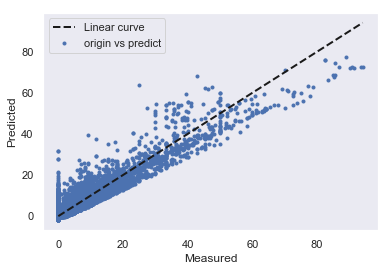

3750 epoch: 	 cost: 13.32320


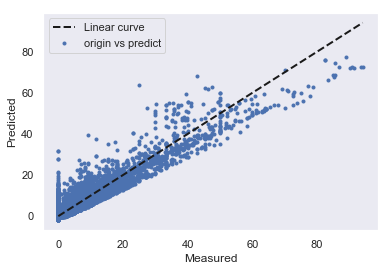

3800 epoch: 	 cost: 13.32320


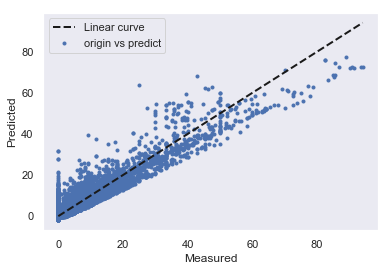

3850 epoch: 	 cost: 13.32320


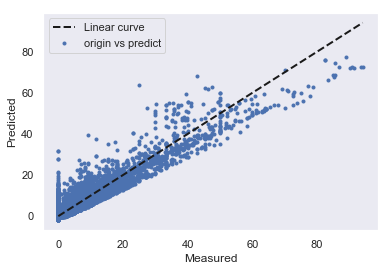

3900 epoch: 	 cost: 13.32320


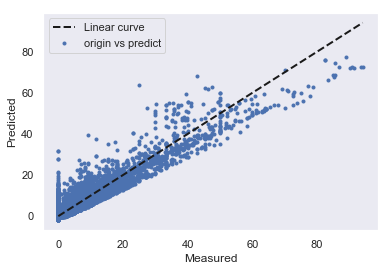

3950 epoch: 	 cost: 13.32320


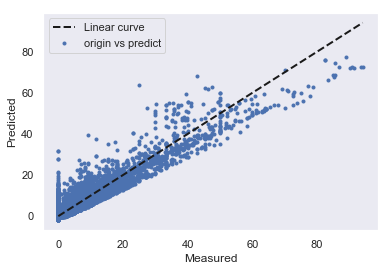

4000 epoch: 	 cost: 13.32320


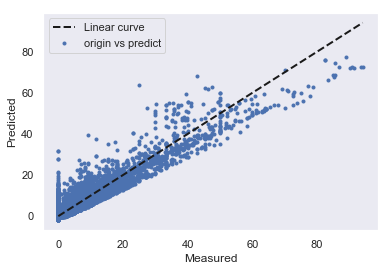

4050 epoch: 	 cost: 13.32320


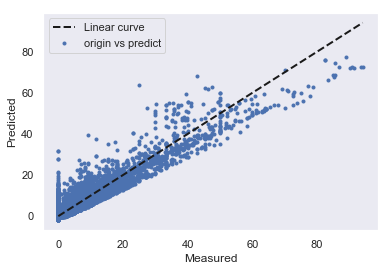

4100 epoch: 	 cost: 13.32320


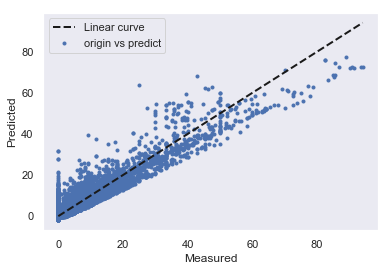

4150 epoch: 	 cost: 13.32320


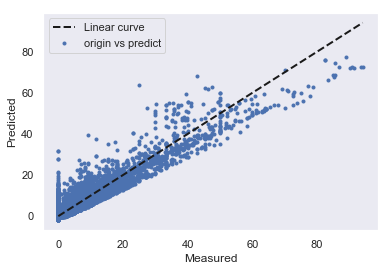

4200 epoch: 	 cost: 13.32320


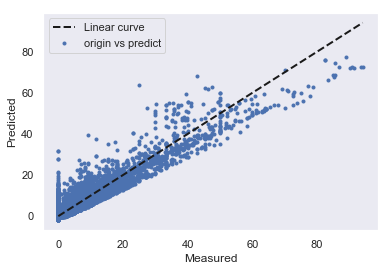

4250 epoch: 	 cost: 13.32320


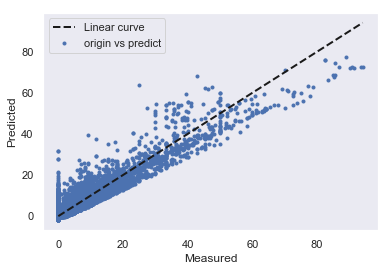

4300 epoch: 	 cost: 13.32320


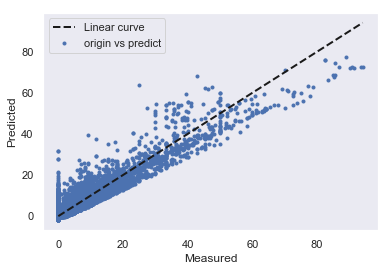

4350 epoch: 	 cost: 13.32320


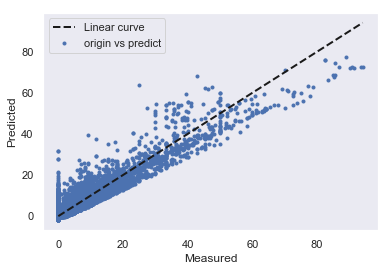

4400 epoch: 	 cost: 13.32320


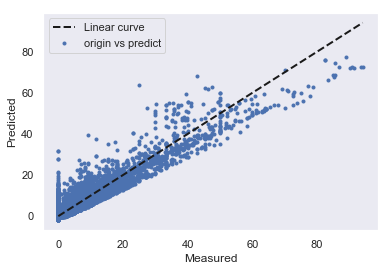

4450 epoch: 	 cost: 13.32320


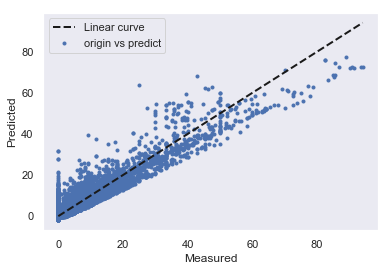

4500 epoch: 	 cost: 13.32320


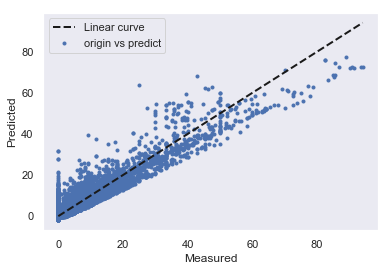

4550 epoch: 	 cost: 13.32320


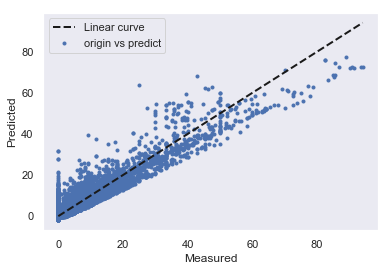

4600 epoch: 	 cost: 13.32320


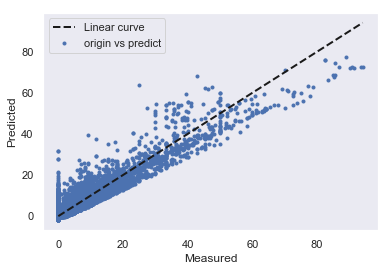

4650 epoch: 	 cost: 13.32320


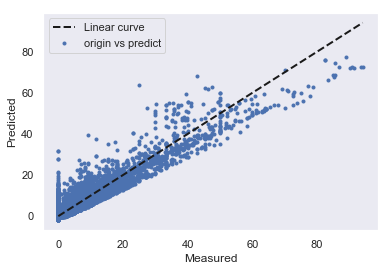

4700 epoch: 	 cost: 13.32320


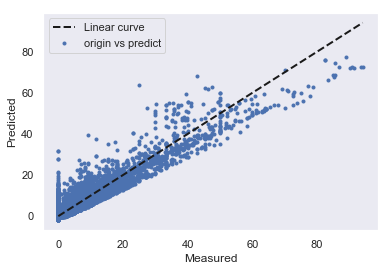

4750 epoch: 	 cost: 13.32320


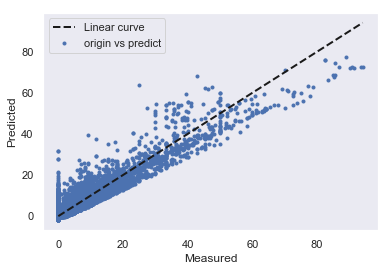

4800 epoch: 	 cost: 13.32320


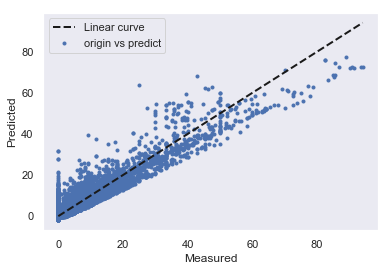

4850 epoch: 	 cost: 13.32320


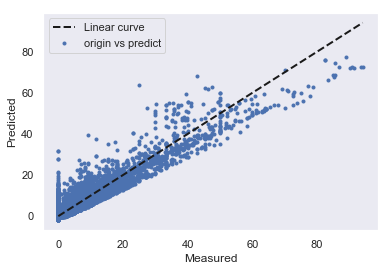

4900 epoch: 	 cost: 13.32320


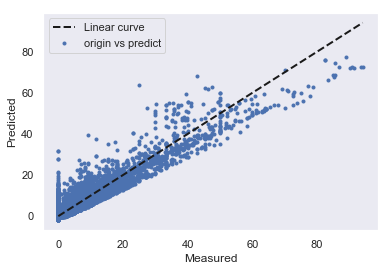

4950 epoch: 	 cost: 13.32320
W: [[-2.4080778e-02]
 [-2.2973391e-01]
 [ 3.3600566e-01]
 [-1.7725824e+00]
 [-5.5691962e+00]
 [ 7.9013312e-01]
 [ 8.4135026e-01]
 [-7.4171204e+01]]
b: 79.693665
cost: 13.323198


In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

all_feed = {x: X_train, y_: Y_train}
m_mes = []
for i in range(epoch):
    for n in range(m_step-1):
        batch_xs = X_train[batch_size*n:batch_size*(n+1)]
        batch_ys = Y_train[batch_size*n:batch_size*(n+1)]

        xs = np.array(batch_xs)
        ys = np.array(batch_ys)

        feed = {x: xs, y_: ys}
        sess.run(train_step, feed_dict=feed)

    if i % 50 == 0:
        pred_y = sess.run(y, feed_dict={x: X_test})

#         plt.clf()
        plt.scatter(Y_test, pred_y,c='b', marker='.',label='origin vs predict')
        plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2,label='Linear curve')
        plt.xlabel('Measured')
        plt.ylabel('Predicted')
        plt.legend()
        plt.grid()
        plt.pause(0.1)
        print("%d epoch: \t cost: %0.5f" % (i,sess.run(cost, feed_dict=all_feed)))
        # print("cost: %f" % sess.run(cost, feed_dict=all_feed))

    m_mes.append(sess.run(cost, feed_dict=all_feed))
plt.close()

print("W: %s" % sess.run(W))
print("b: %f" % sess.run(b))
print("cost: %f" % sess.run(cost, feed_dict=all_feed))

pred_y = sess.run(y, feed_dict={x: X_test})
sess.close()



This is showing the convergence graph whole train the model. 
We can know very easily from this graph that the model train very well


Text(0.5, 1.0, 'Cost vs Epoch')

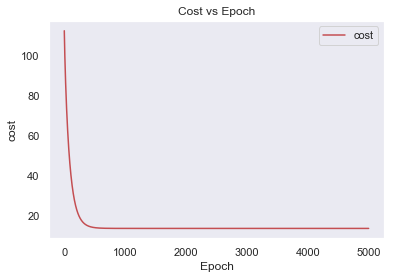

In [28]:
# plt.clf()
plt.plot(m_mes,'r',label='cost')
plt.grid()
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('cost'); plt.title('Cost vs Epoch')


This graph is to plot real test value and predicted value. As we can see the results, the predicted result is almost approch with real test data.


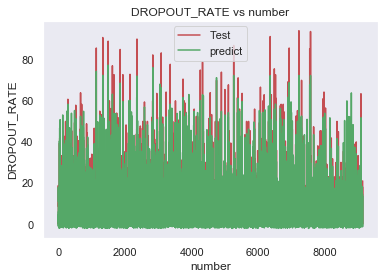

In [29]:
plt.plot(Y_test, 'r', label='Test')
plt.plot(pred_y, 'g', label='predict')
plt.xlabel('number');
plt.ylabel('DROPOUT_RATE');
plt.title('DROPOUT_RATE vs number')
plt.grid()
plt.legend()

In [30]:
Y_test

array([[ 8.62],
       [18.78],
       [ 3.03],
       ...,
       [ 0.  ],
       [ 2.94],
       [21.05]])

In [31]:
pred_y

array([[10.983719 ],
       [17.919037 ],
       [ 1.588768 ],
       ...,
       [-1.2623825],
       [ 2.2653198],
       [14.57222  ]], dtype=float32)